Do some analysis on FPL players

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load teams and player data
players_data = pd.read_csv('players.csv')
teams_data = pd.read_csv('teams.csv')

# Load GW1 players data
gw1_data = pd.read_csv('data/2022-23/GW/GW1.csv')
print('No. of players in gameweek 1:', len(gw1_data))

pos_type = {1:'GK', 2:'DEF', 3:'MID', 4:'FWD'}
teams_id = dict(list(zip(teams_data['id'], teams_data['short_name'])))

No. of players in gameweek 1: 573


In [6]:
# Get players with at least 1 minute played
gw1_data_played = gw1_data[gw1_data['minutes'] > 0]
print('No. of players with more than 0 minutes played:', len(gw1_data_played))

No. of players with more than 0 minutes played: 297


In [7]:
# Plot histogram 
def plot_hist(axs, bins, data, xlabel=None, ylabel=None,
              ec='k', fc='lightsteelblue'):
    
    axs.hist(data, bins=bins, histtype='stepfilled', ec=ec,
             fc=fc)
    axs.set_xlim(bins.min(), bins.max())
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    
# Split table by position
def split_by_position(data):
    
    gk_data = data[data['element_type']==1]
    def_data = data[data['element_type']==2]
    mid_data = data[data['element_type']==3]
    fwd_data = data[data['element_type']==4]
    
    return gk_data, def_data, mid_data, fwd_data

# Get the mean, 25th percentile, and maximum points
def points_stats_summary(data):
    
    median = np.median(data)
    upper_quartile = np.percentile(data, 90)
    max_val = np.max(data)
    
    return median, upper_quartile, max_val

# Get top point earning players
def top_points_players(data, n_players):
    
    data = data.sort_values(by='total_points', ascending=False)
    
    return data[:n_players]

# Print top players summary
def top_players_summary(df, fpl_players):
    
    # Get max points scored
    max_points = df['total_points'].max()
    
    top_players = df[df['total_points']==max_points].reset_index(drop=True)
    
    if len(top_players) == 1:
        player_name = df.iloc[0]['web_name']
        team =  teams_id[df.iloc[0]['team']]
        points = df.iloc[0]['total_points']
        value = df.iloc[0]['value']/10
        owned = df.iloc[0]['selected'] * 100 / fpl_players
        position = df.iloc[0]['element_type']

        print('Top {}: {} ({}), Points: {}, Value: £{}M, selected by: {:.1f}%'.format(
            pos_type[position], player_name, team, points, value, owned))
    elif len(top_players) > 1:
        for i, row in top_players.iterrows():
            player_name = row['web_name']
            team =  teams_id[row['team']]
            points = row['total_points']
            value = row['value']/10
            owned = row['selected'] * 100 / fpl_players
            position = row['element_type']

            print('Top {} ({}/{}): {} ({}), Points: {}, Value: £{}M, selected by: {:.1f}%'.format(
                pos_type[position], i+1, len(top_players), player_name, team, points, value, owned))

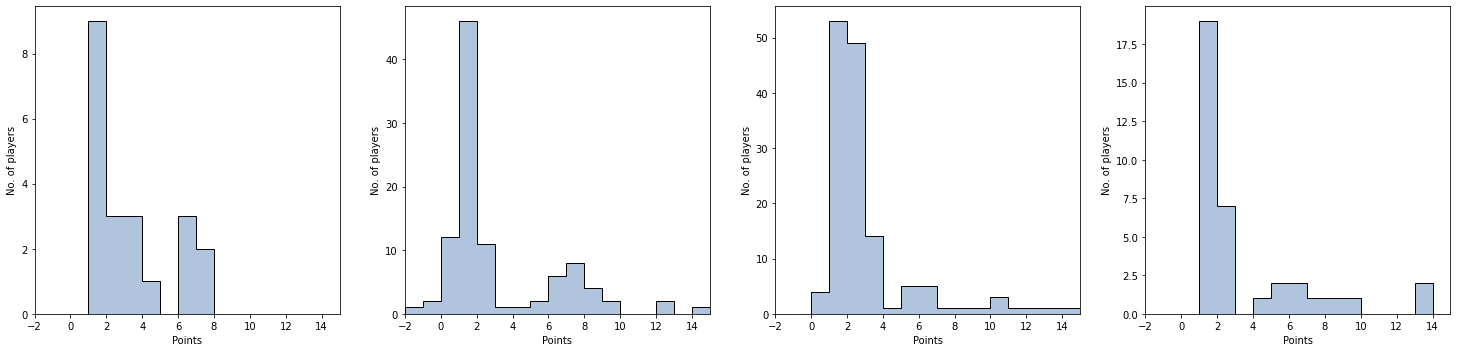

GK points  - Median:2.0, 90th percentile:6.0, Max:7
DEF points - Median:1.0, 90th percentile:7.0, Max:15
MID points - Median:2.0, 90th percentile:6.0, Max:15
FWD points - Median:1.0, 90th percentile:7.5, Max:13


In [8]:
# Plot total points histogram
gw1_total_points = gw1_data_played['total_points'].values
total_points_bins = np.arange(gw1_total_points.min(), gw1_total_points.max()+1)

xlabel = 'Points'
ylabel = 'No. of players'
fig, axs = plt.subplots(1, 4, figsize=(20.5, 5))

#plot_hist(axs[0], bins=total_points_bins, data=gw1_total_points,
#          xlabel=xlabel, ylabel=ylabel)

# Plot total points histogram for each position
gw1_gk = gw1_data_played[gw1_data_played['element_type']==1]
gk_bins = np.arange(gw1_gk['total_points'].min(), gw1_gk['total_points'].max()+1)
plot_hist(axs[0], bins=total_points_bins, data=gw1_gk['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_def = gw1_data_played[gw1_data_played['element_type']==2]
def_bins = np.arange(gw1_def['total_points'].min(), gw1_def['total_points'].max()+1)
plot_hist(axs[1], bins=total_points_bins, data=gw1_def['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_mid = gw1_data_played[gw1_data_played['element_type']==3]
mid_bins = np.arange(gw1_mid['total_points'].min(), gw1_mid['total_points'].max()+1)
plot_hist(axs[2], bins=total_points_bins, data=gw1_mid['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_fwd = gw1_data_played[gw1_data_played['element_type']==4]
fwd_bins = np.arange(gw1_fwd['total_points'].min(), gw1_fwd['total_points'].max()+1)
plot_hist(axs[3], bins=total_points_bins, data=gw1_fwd['total_points'], xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.show()

gk_median, gk_uq, gk_max = points_stats_summary(gw1_gk['total_points'])
def_median, def_uq, def_max = points_stats_summary(gw1_def['total_points'])
mid_median, mid_uq, mid_max = points_stats_summary(gw1_mid['total_points'])
fwd_median, fwd_uq, fwd_max = points_stats_summary(gw1_fwd['total_points'])

print('GK points  - Median:{}, 90th percentile:{}, Max:{}'.format(gk_median, gk_uq, gk_max))
print('DEF points - Median:{}, 90th percentile:{}, Max:{}'.format(def_median, def_uq, def_max))
print('MID points - Median:{}, 90th percentile:{}, Max:{}'.format(mid_median, mid_uq, mid_max))
print('FWD points - Median:{}, 90th percentile:{}, Max:{}'.format(fwd_median, fwd_uq, fwd_max))

In [9]:
# Split data into positions
gw1_gk, gw1_def, gw1_mid, gw1_fwd = split_by_position(gw1_data)
gw1_pos = [gw1_gk, gw1_def, gw1_mid, gw1_fwd]
top_pos = [top_points_players(df, 10) for df in gw1_pos]

# Need to account for tied top point earners
print('='*32 + ' GAMEWEEK 01 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 9.3e6)

================================ GAMEWEEK 01 ================================
Top GK (1/2): Ederson (MCI), Points: 7, Value: £5.5M, selected by: 13.3%
Top GK (2/2): Mendy (CHE), Points: 7, Value: £5.0M, selected by: 17.2%
Top DEF: Schär (NEW), Points: 15, Value: £4.5M, selected by: 0.4%
Top MID: Groß (BHA), Points: 15, Value: £5.5M, selected by: 0.1%
Top FWD (1/2): Mitrović (FUL), Points: 13, Value: £6.5M, selected by: 5.5%
Top FWD (2/2): Haaland (MCI), Points: 13, Value: £11.5M, selected by: 36.5%


In [10]:
# Do the same as above
gw2_data = pd.read_csv('data/2022-23/GW/GW2.csv')
gw2_pos = split_by_position(gw2_data)
top_pos = [top_points_players(df, 10) for df in gw2_pos]

print('='*32 + ' GAMEWEEK 02 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 9.4e6)

================================ GAMEWEEK 02 ================================
Top GK: Sá (WOL), Points: 15, Value: £5.0M, selected by: 3.4%
Top DEF: Mee (BRE), Points: 14, Value: £4.5M, selected by: 0.3%
Top MID: Rodrigo (LEE), Points: 15, Value: £6.0M, selected by: 1.7%
Top FWD: Jesus (ARS), Points: 19, Value: £8.0M, selected by: 66.1%


In [11]:
# Do the same as above
gw3_data = pd.read_csv('data/2022-23/GW/GW3.csv')
gw3_pos = split_by_position(gw3_data)
top_pos = [top_points_players(df, 10) for df in gw3_pos]

print('='*32 + ' GAMEWEEK 03 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 9.5e6)

================================ GAMEWEEK 03 ================================
Top GK: Martínez (AVL), Points: 10, Value: £5.0M, selected by: 5.1%
Top DEF: Saliba (ARS), Points: 14, Value: £4.5M, selected by: 5.5%
Top MID: Ødegaard (ARS), Points: 16, Value: £6.4M, selected by: 10.8%
Top FWD: Adams (SOU), Points: 12, Value: £6.4M, selected by: 0.5%


In [12]:
# Do the same as above
gw4_data = pd.read_csv('data/2022-23/GW/GW4.csv')
gw4_pos = split_by_position(gw4_data)
top_pos = [top_points_players(df, 10) for df in gw4_pos]

print('='*32 + ' GAMEWEEK 04 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 9.7e6)

================================ GAMEWEEK 04 ================================
Top GK: Henderson (NFO), Points: 9, Value: £4.6M, selected by: 9.7%
Top DEF: Alexander-Arnold (LIV), Points: 17, Value: £7.5M, selected by: 46.5%
Top MID: Sterling (CHE), Points: 15, Value: £9.9M, selected by: 4.9%
Top FWD: Firmino (LIV), Points: 22, Value: £8.0M, selected by: 1.4%


In [13]:
# Do the same as above
gw5_data = pd.read_csv('data/2022-23/GW/GW5.csv')
gw5_pos = split_by_position(gw5_data)
top_pos = [top_points_players(df, 10) for df in gw5_pos]

print('='*32 + ' GAMEWEEK 05 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 10e6)

================================ GAMEWEEK 05 ================================
Top GK (1/4): Ederson (MCI), Points: 6, Value: £5.5M, selected by: 17.5%
Top GK (2/4): Neto (BOU), Points: 6, Value: £4.5M, selected by: 0.1%
Top GK (3/4): Sá (WOL), Points: 6, Value: £5.0M, selected by: 5.0%
Top GK (4/4): De Gea (MUN), Points: 6, Value: £4.9M, selected by: 5.4%
Top DEF: Cancelo (MCI), Points: 12, Value: £7.1M, selected by: 44.3%
Top MID (1/6): Salah (LIV), Points: 10, Value: £13.0M, selected by: 53.6%
Top MID (2/6): Mac Allister (BHA), Points: 10, Value: £5.5M, selected by: 0.4%
Top MID (3/6): Sancho (MUN), Points: 10, Value: £7.3M, selected by: 5.2%
Top MID (4/6): Martinelli (ARS), Points: 10, Value: £6.4M, selected by: 39.5%
Top MID (5/6): Sinisterra (LEE), Points: 10, Value: £6.5M, selected by: 0.2%
Top MID (6/6): Soucek (WHU), Points: 10, Value: £5.4M, selected by: 1.1%
Top FWD: Haaland (MCI), Points: 17, Value: £11.8M, selected by: 67.9%


In [14]:
# Merge gameweek tables
to_merge = [gw1_data, gw2_data, gw3_data, gw4_data, gw5_data]
gw_merged = pd.concat(to_merge).reset_index(drop=True)

In [16]:
# Get list of unique players in merged gameweek table
merged_unique_players = gw_merged['element'].unique()

# Get cumulative stats
merged_stats = []
for i, player in enumerate(merged_unique_players):
    
    print('{}/{} ({:.1f}%)'.format(i+1, len(merged_unique_players),
                                   (i+1)*100/len(merged_unique_players)), end='\r')
    
    gw_data = gw_merged[gw_merged['element']==player]
    
    # Get total stats
    name = gw_data['web_name'].unique()[0]
    points = gw_data['total_points'].sum()
    minutes = gw_data['minutes'].sum()
    goals = gw_data['goals_scored'].sum()
    assists = gw_data['assists'].sum()
    clean_sheets = gw_data['clean_sheets'].sum()
    conceded = gw_data['goals_conceded'].sum()
    bonus = gw_data['bonus'].sum()
    avg_value = np.round(np.mean(gw_data['value'])/10, 1)
    team = gw_data['team'].unique()[0]
    pos = gw_data['element_type'].unique()[0]
    
    total_data = {
        'name':name,
        'total_points':points,
        'minutes':minutes,
        'goals_scored':goals,
        'assists':assists,
        'clean_sheets':clean_sheets,
        'goals_condeded':conceded,
        'bonus':bonus,
        'average_value':avg_value,
        'team':teams_id[team],
        'element_type':pos
    }
    
    merged_stats.append(total_data)

In [17]:
merged_gw_df = pd.DataFrame(merged_stats)

In [18]:
merged_gw_df.sort_values(by='total_points', ascending=False)[:20]

,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
317,Haaland,58,391,9,1,3,5,9,11.7,MCI,4
224,Rodrigo,38,357,4,1,1,5,5,6.2,LEE,3
103,Groß,37,450,3,1,3,3,6,5.7,BHA,3
282,Salah,35,450,2,3,1,6,5,13.0,LIV,3
209,Mitrović,34,450,5,0,1,7,7,6.6,FUL,4
278,Firmino,34,298,3,3,1,4,6,8.0,LIV,4
18,Martinelli,34,434,3,1,2,4,4,6.2,ARS,3
303,Sterling,32,423,3,1,1,7,4,10.0,CHE,3
6,Ødegaard,32,423,3,0,2,4,6,6.5,ARS,3
27,Jesus,32,430,3,3,2,4,3,8.1,ARS,4


,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
0,Henderson,30,450,0,0,1,11,5,4.5,NFO,1
1,Sá,29,450,0,0,2,4,3,5.0,WOL,1
2,Sánchez,27,450,0,0,3,3,4,4.5,BHA,1
3,Pope,24,450,0,0,2,6,3,5.0,NEW,1
4,Lloris,23,450,0,0,2,4,4,5.5,TOT,1
5,Ederson,21,450,0,0,3,5,1,5.5,MCI,1
6,Raya,21,450,0,0,1,7,2,4.5,BRE,1
7,Martínez,19,450,0,0,0,9,2,5.0,AVL,1
8,De Gea,19,450,0,0,2,7,1,4.9,MUN,1
9,Fabianski,17,388,0,0,1,4,2,5.0,WHU,1


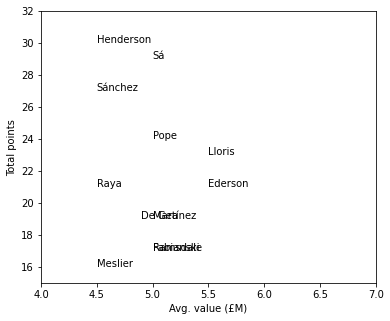

,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
0,Cancelo,31,397,1,1,3,5,4,7.1,MCI,2
1,Saliba,29,450,1,1,2,4,6,4.6,ARS,2
2,Gabriel,26,450,1,0,2,4,3,5.0,ARS,2
3,Veltman,25,402,0,0,3,3,4,4.5,BHA,2
4,Dier,24,450,1,0,2,4,1,5.0,TOT,2
5,Perišić,24,273,0,2,2,1,3,5.5,TOT,2
6,Emerson Royal,24,437,0,2,2,4,1,5.0,TOT,2
7,Alexander-Arnold,23,422,1,1,1,6,3,7.5,LIV,2
8,James,22,360,1,1,1,6,5,6.1,CHE,2
9,Trippier,22,450,1,0,2,6,2,5.0,NEW,2


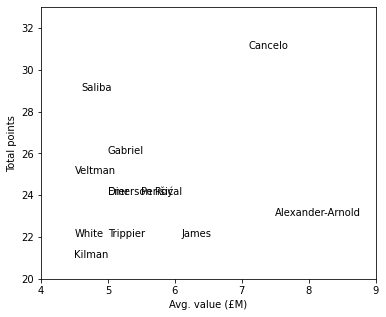

,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
0,Rodrigo,38,357,4,1,1,5,5,6.2,LEE,3
1,Groß,37,450,3,1,3,3,6,5.7,BHA,3
2,Salah,35,450,2,3,1,6,5,13.0,LIV,3
3,Martinelli,34,434,3,1,2,4,4,6.2,ARS,3
4,Ødegaard,32,423,3,0,2,4,6,6.5,ARS,3
5,Sterling,32,423,3,1,1,7,4,10.0,CHE,3
6,Bernardo,30,307,2,2,1,5,5,6.9,MCI,3
7,Luis Díaz,29,437,3,0,1,6,4,8.0,LIV,3
8,Zaha,28,351,4,0,0,5,3,7.0,CRY,3
9,De Bruyne,28,376,1,3,2,5,3,12.1,MCI,3


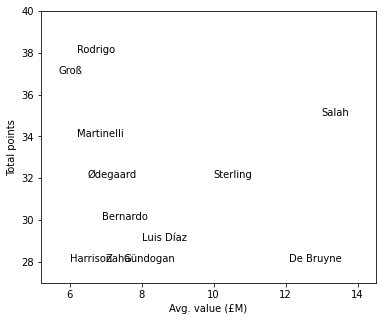

,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
0,Haaland,58,391,9,1,3,5,9,11.7,MCI,4
1,Firmino,34,298,3,3,1,4,6,8.0,LIV,4
2,Mitrović,34,450,5,0,1,7,7,6.6,FUL,4
3,Jesus,32,430,3,3,2,4,3,8.1,ARS,4
4,Kane,31,450,4,1,2,4,6,11.4,TOT,4
5,Toney,28,450,2,2,1,7,5,7.1,BRE,4
6,Watkins,22,384,1,2,0,8,3,7.4,AVL,4
7,Adams,18,301,2,0,0,4,3,6.4,SOU,4
8,A.Armstrong,18,304,1,1,0,5,3,5.5,SOU,4
9,Welbeck,17,384,0,2,3,1,2,6.5,BHA,4


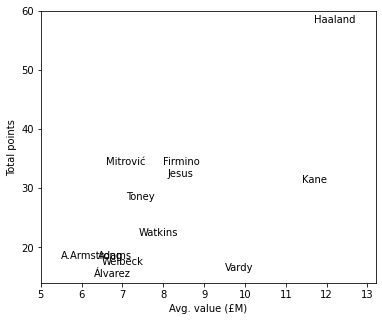

In [19]:
gw_merged_pos = split_by_position(merged_gw_df)
top_merged_pos = [top_points_players(df, 12) for df in gw_merged_pos]

for df in top_merged_pos:
    display(df.reset_index(drop=True))
    
    plt.figure(figsize=(6,5))
    plt.xlim(df['average_value'].min()-0.5, df['average_value'].max()+1.5)
    plt.ylim(df['total_points'].min()-1, df['total_points'].max()+2)
    for i, row in df.iterrows():
        plt.text(x=row['average_value'], y=row['total_points'], s=row['name'])
    
    plt.xlabel('Avg. value (£M)')
    plt.ylabel('Total points')
    plt.show()